In [ ]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_transactions = 1000
fraud_ratio = 0.05

# Features
transaction_amount = np.random.exponential(scale=100, size=num_transactions)
transaction_time = np.random.uniform(low=0, high=24, size=num_transactions)
is_fraud = np.random.choice([0, 1], size=num_transactions, p=[1-fraud_ratio, fraud_ratio])

# Create DataFrame
data = pd.DataFrame({
    'TransactionAmount': transaction_amount,
    'TransactionTime': transaction_time,
    'IsFraud': is_fraud
})

# Display the first few rows of the dataset
data.head(20)

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of transaction amounts by fraud status
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsFraud', y='TransactionAmount', data=data)
plt.title('Box Plot of Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()


# Scatter plot of transaction amount vs. transaction time, colored by fraud status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TransactionTime', y='TransactionAmount', hue='IsFraud', data=data)
plt.title('Scatter Plot of Transaction Amount vs. Transaction Time')
plt.xlabel('Transaction Time')
plt.ylabel('Transaction Amount')
plt.show()


# Scattermatrix plot of the dataset
sns.pairplot(data, hue='IsFraud', diag_kind='kde')
plt.suptitle('Scattermatrix Plot of Fraud Detection Dataset', y=1.02)
plt.show()


# Histogram of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='TransactionAmount', hue='IsFraud', bins=30, kde=True)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Histogram of transaction times
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='TransactionTime', hue='IsFraud', bins=24, kde=True)
plt.title('Histogram of Transaction Times')
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some example data
data = np.random.randn(1000)  # 1000 random numbers from a normal distribution

# Create a histogram with Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Histogram with KDE of Randomly Generated Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd

# Download historical stock price data for Apple (AAPL) for the last 5 years
data = yf.download('AAPL', start='2010-01-01', end='2023-05-01')
data = data[['Close']]  # We'll use the closing price for prediction
data.head()

In [ ]:
import numpy as np

# Create the dataset with features and labels
def create_dataset(data, window_size=5):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Prepare the data
window_size = 5
data_values = data['Close'].values
X, y = create_dataset(data_values, window_size)

# Split the data into training and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

In [ ]:
# Make future predictions using the last available data points
last_window = data_values[-window_size:]
next_day_prediction = model.predict([last_window])
print(f'Predicted closing price for the next day: {next_day_prediction[0]}')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Collection
# Generate synthetic data
np.random.seed(42)
num_transactions = 1000
fraud_ratio = 0.05

# Features
transaction_amount = np.random.exponential(scale=100, size=num_transactions)
transaction_time = np.random.uniform(low=0, high=24, size=num_transactions)
is_fraud = np.random.choice([0, 1], size=num_transactions, p=[1-fraud_ratio, fraud_ratio])

# Create DataFrame
data = pd.DataFrame({
    'TransactionAmount': transaction_amount,
    'TransactionTime': transaction_time,
    'IsFraud': is_fraud
})

# Step 2: Data Preprocessing
# Split the data into features (X) and labels (y)
X = data[['TransactionAmount', 'TransactionTime']]
y = data['IsFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Training
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 5: Making Predictions
# Make a prediction on a new transaction
new_transaction = np.array([[120, 12]])  # Example: transaction amount = 120, transaction time = 12
new_transaction_scaled = scaler.transform(new_transaction)
new_prediction = model.predict(new_transaction_scaled)

print(f'New transaction prediction (1 = Fraud, 0 = Not Fraud): {new_prediction[0]}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def generate_synthetic_image(shape, img_size=64):
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    if shape == 'circle':
        cv2.circle(img, (img_size//2, img_size//2), img_size//4, 255, -1)
    elif shape == 'square':
        cv2.rectangle(img, (img_size//4, img_size//4), (3*img_size//4, 3*img_size//4), 255, -1)
    return img

def create_synthetic_dataset(num_samples, img_size=64):
    images = []
    labels = []
    for _ in range(num_samples):
        shape = np.random.choice(['circle', 'square'])
        img = generate_synthetic_image(shape, img_size)
        images.append(img)
        labels.append(0 if shape == 'circle' else 1)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

num_samples = 1000
img_size = 64
X, y = create_synthetic_dataset(num_samples, img_size)

# Normalize the images
X = X / 255.0

# Reshape the images for the model
X = X.reshape(X.shape[0], img_size, img_size, 1)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install opencv-python

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

In [ ]:
# Example code to illustrate overfitting
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, 100)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a polynomial regression model (degree 15) to overfit the data
poly = PolynomialFeatures(degree=15)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X, model.predict(poly.transform(X)), color='red', label='Model Prediction')
plt.legend()
plt.title('Overfitting Example')
plt.show()

print(f'Train MSE: {mean_squared_error(y_train, y_train_pred):.2f}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred):.2f}')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Collect Data
# Fetch the Boston Housing dataset from OpenML
boston = fetch_openml(data_id=531, as_frame=True)
X = boston.data
y = boston.target


# Create a DataFrame for better visualization and manipulation
df = pd.DataFrame(X, columns=boston.feature_names)
df['PRICE'] = y

# Display the first few rows of the dataset
print(df.head())

# Step 2: Preprocess Data
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Build the Model
# Create a Linear Regression model
model = LinearRegression()

# Step 4: Train the Model
# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Step 5: Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Step 6: Make Predictions
# Example: Predict the price of a new home with custom features
new_home_features = np.array([[0.2, 0, 7.07, 0, 0.469, 6.421, 78.9, 4.9671, 2, 242, 17.8, 396.90, 9.14]])
new_home_features_scaled = scaler.transform(new_home_features)
predicted_price = model.predict(new_home_features_scaled)
print(f'Predicted price for the new home: ${predicted_price[0]*1000:.2f}')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Fetch the Boston Housing dataset from OpenML
boston = fetch_openml(data_id=531, as_frame=True)
X = boston.data
y = boston.target

# Display the first few rows of the dataset
print(X.head())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Example: Predict the price of a new home with custom features
new_home_features = np.array([[0.2, 0, 7.07, 0, 0.469, 6.421, 78.9, 4.9671, 2, 242, 17.8, 396.90, 9.14]])
new_home_features_scaled = scaler.transform(new_home_features)
predicted_price = model.predict(new_home_features_scaled)
print(f'Predicted price for the new home: ${predicted_price[0]*1000:.2f}')

In [ ]:
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Collect Data
# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = '2CQIBKI5638ILVG7'
symbol = 'SGD/VND'
url = f'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=SGD&to_symbol=VND&apikey={api_key}&outputsize=full'

# Get the data
response = requests.get(url)
data = response.json()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data['Time Series FX (Daily)']).T
df.columns = ['Open', 'High', 'Low', 'Close']
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df = df.apply(pd.to_numeric)

# Display the first few rows of the dataset
print(df.head())

# Step 2: Preprocess Data
# We will predict the next day's closing price based on previous day's data
df['Next_Close'] = df['Close'].shift(-1)
df = df.dropna()

# Split the data into features and labels
X = df[['Open', 'High', 'Low', 'Close']]
y = df['Next_Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Build the Model
# Create a Linear Regression model
model = LinearRegression()

# Step 4: Train the Model
# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Step 5: Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.6f}')
print(f'Mean Squared Error (MSE): {mse:.6f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.6f}')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()

# Step 6: Make Predictions for the Next 30 Days
# Initialize the data with the latest available data
last_data = df.iloc[-1][['Open', 'High', 'Low', 'Close']].values.reshape(1, -1)
last_data_scaled = scaler.transform(last_data)

predictions = []
for _ in range(30):
    # Predict the next closing price
    next_close = model.predict(last_data_scaled)[0]
    predictions.append(next_close)
    
    # Prepare the next input data (shift the window)
    new_row = last_data[0].copy()
    new_row[-1] = next_close
    last_data = np.roll(last_data, -1)
    last_data[0, -1] = next_close
    last_data_scaled = scaler.transform(last_data)

# Create a date range for the next 30 days
last_date = df.index[-1]
future_dates = pd.date_range(last_date, periods=30, freq='D')

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, index=future_dates, columns=['Predicted_Close'])

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Historical Close Prices')
plt.plot(predictions_df.index, predictions_df['Predicted_Close'], label='Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SGD/VND Close Price Prediction for the Next 30 Days')
plt.legend()
plt.show()

# Display the predicted close prices for the next 30 days
print(predictions_df)

In [ ]:
import pandas as pd
import numpy as np
from datasets import load_dataset

# Load dataset
dataset = load_dataset('cnn_dailymail', '3.0.0', split='train[:1%]')  # Using only 1% for demonstration

# Prepare data
data = {'article': dataset['article'], 'summary': dataset['highlights']}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('data/summarization_train.csv', index=False)

# Verify data
df.head()

In [ ]:
!pip install datasets

In [ ]:
%%writefile train.py

import argparse
import os
import pandas as pd
import transformers
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from datasets import load_dataset, load_metric, Dataset
import torch

def model_fn(model_dir):
    model = T5ForConditionalGeneration.from_pretrained(model_dir)
    tokenizer = T5Tokenizer.from_pretrained(model_dir)
    return model, tokenizer

def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples['article']]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['summary'], max_length=128, truncation=True)
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

if __name__ == "__main__":
    parser = argparse.ArgumentParser()

    # SageMaker parameters
    parser.add_argument('--output-data-dir', type=str, default=os.environ['SM_OUTPUT_DATA_DIR'])
    parser.add_argument('--model-dir', type=str, default=os.environ['SM_MODEL_DIR'])
    parser.add_argument('--train', type=str, default=os.environ['SM_CHANNEL_TRAIN'])
    
    args = parser.parse_args()
    
    # Load dataset
    df = pd.read_csv(os.path.join(args.train, "summarization_train.csv"))
    dataset = Dataset.from_pandas(df)
    
    # Load tokenizer and model
    model_name = "t5-small"
    tokenizer = T5Tokenizer.from_pretrained(model_name)
    model = T5ForConditionalGeneration.from_pretrained(model_name)
    
    prefix = "summarize: "
    
    tokenized_datasets = dataset.map(preprocess_function, batched=True)
    
    training_args = TrainingArguments(
        output_dir=args.model_dir,
        evaluation_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=4,
        per_device_eval_batch_size=4,
        num_train_epochs=1,
        weight_decay=0.01,
        save_total_limit=3,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets,
        tokenizer=tokenizer,
    )
    
    trainer.train()
    
    model.save_pretrained(args.model_dir)
    tokenizer.save_pretrained(args.model_dir)

In [ ]:
import sagemaker
from sagemaker.tensorflow import TensorFlow

# Initialize the SageMaker session
sagemaker_session = sagemaker.LocalSession()
sagemaker_session.config = {'local': {'local_code': True}}

# Define the TensorFlow estimator
tensorflow_estimator = TensorFlow(
    entry_point='train.py',
    source_dir='.',  # Directory where train.py is located
    role='arn:aws:iam::504441261471:role/service-role/AmazonSageMaker-ExecutionRole-20240513T142340',  # Update this with your actual SageMaker role
    instance_count=1,
    instance_type='local',
    sagemaker_session=sagemaker_session,
    framework_version='2.3.0',
    py_version='py37'
)

# Specify the location of the training data
train_input = 'file://data/summarization_train.csv'

# Train the model
tensorflow_estimator.fit({'train': train_input})

In [ ]:
!pip install -U sagemaker

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42)
time = np.arange(0, 1000, 0.1)
signal = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

# Add some anomalies
anomalies = np.random.choice([0, 1], size=len(time), p=[0.99, 0.01])
signal += anomalies * np.random.normal(scale=5.0, size=len(time))

# Create a DataFrame
df = pd.DataFrame({'timestamp': time, 'value': signal})

# Save to CSV
df.to_csv('data/anomaly_detection.csv', index=False)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'], label='Signal with Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
import sagemaker
from sagemaker import RandomCutForest

# Initialize the SageMaker session
sagemaker_session = sagemaker.LocalSession()
sagemaker_session.config = {'local': {'local_code': True}}

# Define the Random Cut Forest estimator
# rcf_estimator = RandomCutForest(
#     role='arn:aws:iam::504441261471:role/service-role/AmazonSageMaker-ExecutionRole-20240513T142340',  # Specified SageMaker role ARN
#     instance_count=1,
#     instance_type='local',
#     num_trees=100,
#     num_samples_per_tree=256,
#     sagemaker_session=sagemaker_session
# )

# Define the Random Cut Forest estimator
rcf_estimator = RandomCutForest(
    role='arn:aws:iam::504441261471:role/service-role/AmazonSageMaker-ExecutionRole-20240513T142340',  # Specified SageMaker role ARN
    instance_count=1,
    instance_type='local',
    num_trees=100,
    num_samples_per_tree=256,
    sagemaker_session=sagemaker_session
)

# Specify the location of the training data
train_input = 'file://data/anomaly_detection.csv'

# Train the model
rcf_estimator.fit({'train': train_input})

In [ ]:
import pandas as pd
import numpy as np

# Simulate a weather dataset
np.random.seed(42)
dates = pd.date_range(start='1/1/2020', periods=1000, freq='H')
temperature = 15 + 8 * np.sin(np.linspace(0, 10 * np.pi, 1000)) + np.random.randn(1000)
humidity = 50 + 20 * np.sin(np.linspace(0, 5 * np.pi, 1000)) + np.random.randn(1000)
wind_speed = 5 + 2 * np.random.randn(1000)

data = pd.DataFrame({'date': dates, 'temperature': temperature, 'humidity': humidity, 'wind_speed': wind_speed})
data.set_index('date', inplace=True)
data.head()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Preprocess the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        y.append(data[i + look_back, 0])  # Predicting temperature
    return np.array(X), np.array(y)

look_back = 10
X, y = create_dataset(data_scaled, look_back)
X = X.reshape(X.shape[0], look_back, X.shape[2])  # Reshape for LSTM input

# Define the model
def create_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(look_back, X.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [1]:
import pandas as pd

# Sample dataset
data = {
    'title': [
        'Introduction to Machine Learning',
        'Advanced Physics',
        'Organic Chemistry',
        'Modern Art History',
        'Ancient Civilizations',
        'Data Structures and Algorithms',
        'Classical Mechanics',
        'Quantum Chemistry',
        'Renaissance Art',
        'World History'
    ],
    'discipline': [
        'Computer Science',
        'Physics',
        'Chemistry',
        'Art',
        'History',
        'Computer Science',
        'Physics',
        'Chemistry',
        'Art',
        'History'
    ]
}

df = pd.DataFrame(data)
df.head()

,title,discipline
0,Introduction to Machine Learning,Computer Science
1,Advanced Physics,Physics
2,Organic Chemistry,Chemistry
3,Modern Art History,Art
4,Ancient Civilizations,History


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

# Preprocess the text
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

df['title'] = df['title'].apply(preprocess_text)
df.head()


[nltk_data] Downloading package punkt to /Users/anhtrang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anhtrang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,discipline
0,introduction machine learning,Computer Science
1,advanced physics,Physics
2,organic chemistry,Chemistry
3,modern art history,Art
4,ancient civilizations,History


In [5]:
!pip install nltk

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['title'])
y = df['discipline']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

                  precision    recall  f1-score   support

             Art       0.00      0.00      0.00       1.0
Computer Science       0.00      0.00      0.00       0.0
         Physics       0.00      0.00      0.00       1.0

        accuracy                           0.00       2.0
       macro avg       0.00      0.00      0.00       2.0
    weighted avg       0.00      0.00      0.00       2.0

Accuracy: 0.0


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_

In [11]:
# Predict the category of a new book
new_titles = [
    'Deep Learning with Python',
    'The Art of Ancient Greece',
    'Fundamentals of Organic Chemistry'
]

# Preprocess the new titles
new_titles_preprocessed = [preprocess_text(title) for title in new_titles]

# Convert to numerical features
new_X = vectorizer.transform(new_titles_preprocessed)

# Predict the categories
new_predictions = model.predict(new_X)
for title, category in zip(new_titles, new_predictions):
    print(f'Title: "{title}" is categorized as "{category}"')

Title: "Deep Learning with Python" is categorized as "Computer Science"
Title: "The Art of Ancient Greece" is categorized as "History"
Title: "Fundamentals of Organic Chemistry" is categorized as "Chemistry"


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Directory paths
dataset_dir = 'data/images'
categories = ['adult', 'safe']

# Image size
img_size = 224

# Load data
data = []
labels = []

for category in categories:
    path = os.path.join(dataset_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            resized_array = cv2.resize(img_array, (img_size, img_size))
            data.append(resized_array)
            labels.append(class_num)
        except Exception as e:
            pass

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize the data
data = data / 255.0

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Validation data shape: {X_val.shape}')

FileNotFoundError: [Errno 2] No such file or directory: 'data/images/adult'

In [3]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 7.4 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=d012ffb3a7003f3cfc32c015fa7bc804b643788735cba85106fdeeb45e7a175b
  Stored in directory: /Users/anhtrang/Library/Caches/pip/wheels/f3/eb/e9/819c2d9eac90204eec8579430759f75a1d6dbe4cd0b93f53bc
Successfully built kaggle


In [6]:
kaggle datasets download -d mehuljain/nsfw-data

SyntaxError: invalid syntax (4223095705.py, line 1)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Define the number of samples
n_samples = 1000

# Generate synthetic data
X, y = make_classification(n_samples=n_samples, n_features=4, n_informative=3, n_redundant=0, n_classes=2, random_state=42)

# Create a DataFrame
columns = ['age', 'income', 'loan_amount', 'credit_score']
data = pd.DataFrame(X, columns=columns)
data['approved'] = y

# Convert data to appropriate scales
data['age'] = (data['age'] * 10 + 40).astype(int)
data['income'] = (data['income'] * 10000 + 50000).astype(int)
data['loan_amount'] = (data['loan_amount'] * 5000 + 20000).astype(int)
data['credit_score'] = (data['credit_score'] * 100 + 600).astype(int)

data.head()

,age,income,loan_amount,credit_score,approved
0,51,38898,23954,508,0
1,41,64992,20021,698,1
2,56,51267,20348,622,1
3,34,48307,14498,377,0
4,41,25206,21485,751,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X = data.drop('approved', axis=1)
y = data['approved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

print(X_train)
print(X_test)

(800, 4)
(200, 4)
[[-0.94421956 -0.3355391   0.71166616 -0.56793927]
 [-0.24966688  1.06694243 -0.00983951  1.25929677]
 [ 0.34566398  0.30824479  0.85575383  0.79650336]
 ...
 [-2.13488129 -0.61423414 -1.05306474 -0.59985606]
 [ 0.44488579  0.06357355  0.18136254 -0.92700312]
 [-0.24966688 -0.30451739 -0.16597261 -0.72752321]]
[[ 0.74255123 -0.0101447  -0.45369052 -1.19829581]
 [-0.4481105  -1.33415465  0.66988836 -0.44027213]
 [-0.4481105  -0.3737325   1.12060069 -0.64773124]
 [-0.64655413  0.79591942 -0.53663623  0.62894023]
 [-0.05122326 -1.74777746 -0.41541962 -0.04131229]
 [ 0.14722036 -1.05170698 -0.74445792  0.26987638]
 [-1.93643767  0.65890687  0.53754116  1.6662358 ]
 [-0.34888869  0.28714669  0.1798378   0.24593879]
 [ 0.04799855  0.10518601 -0.73637681 -0.96689911]
 [ 0.84177304 -3.328884   -2.6810267   1.9056117 ]
 [ 0.64332942 -0.47747176  0.2790982  -1.7009852 ]
 [-1.93643767 -0.75258097 -0.76275477 -0.11312506]
 [ 0.14722036  0.51705759  1.15231522  1.46675588]
 [-1.14

In [7]:
from sklearn.linear_model import LogisticRegression

# Build the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.92
Precision: 0.9545454545454546
Recall: 0.875
F1 Score: 0.9130434782608695

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       104
           1       0.95      0.88      0.91        96

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [30]:
import joblib

# Save the model
joblib.dump(model, 'loan_approval_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Function to load the model and make predictions
def predict_loan_approval(input_data):
    model = joblib.load('loan_approval_model.pkl')
    scaler = joblib.load('scaler.pkl')
    input_data = scaler.transform([input_data])
    prediction = model.predict(input_data)
    # print(prediction)
    return 'Approved' if prediction[0] == 1 else 'Not Approved'

# Example usage
# new_application = [45, 60000, 25000, 700]  # Example input data
new_application = [100, 20000, 1000000, 300]
result = predict_loan_approval(new_application)
print(result)

Approved


/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
import numpy as np

# Example data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

# Initialize parameters
theta = np.zeros(3)  # Two weights and one bias
learning_rate = 0.01
num_iterations = 1000

# Add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Gradient Descent
for iteration in range(num_iterations):
    gradients = 2 / X_b.shape[0] * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients

# Model parameters (theta) after training
print(f"Model parameters: {theta}")

Model parameters: [2.59441966 1.22746462 2.01671371]


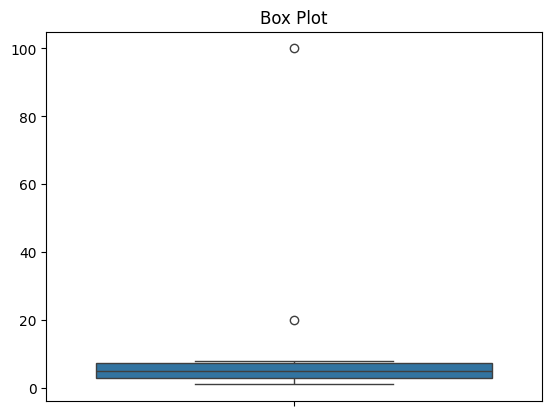

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = [1, 2, 2, 3, 4, 5, 5, 6, 7, 8, 20,100]

# Create a box plot
sns.boxplot(data=data)
plt.title("Box Plot")
plt.show()

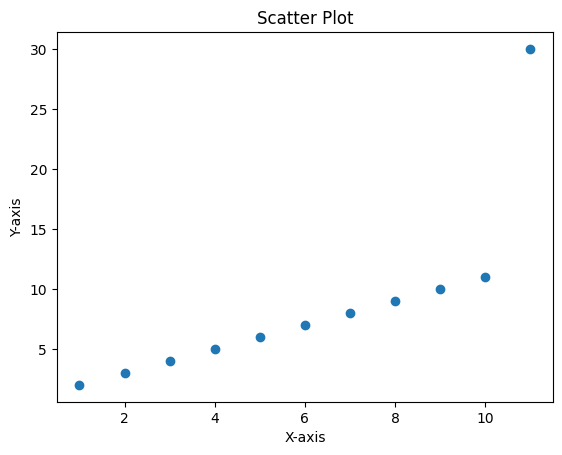

In [34]:
import matplotlib.pyplot as plt

# Example data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 30]

# Create a scatter plot
plt.scatter(x, y)
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

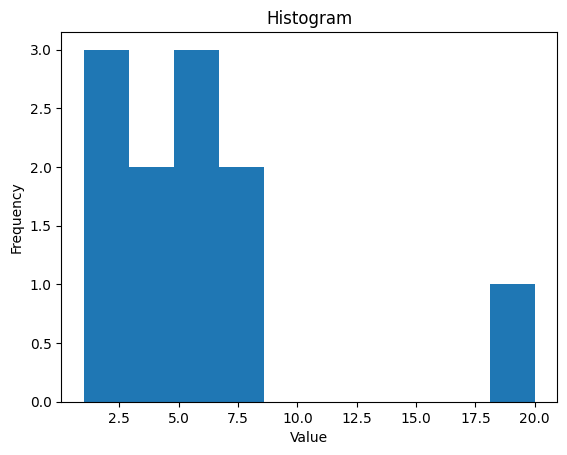

In [35]:
import matplotlib.pyplot as plt

# Example data
data = [1, 2, 2, 3, 4, 5, 5, 6, 7, 8, 20]

# Create a histogram
plt.hist(data, bins=10)
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

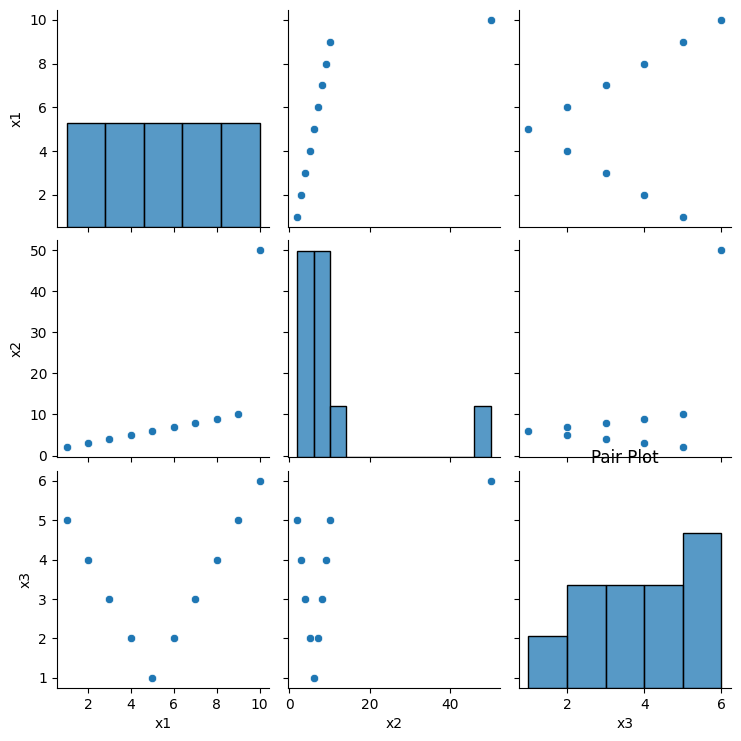

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example data
data = {
    'x1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'x2': [2, 3, 4, 5, 6, 7, 8, 9, 10, 50],
    'x3': [5, 4, 3, 2, 1, 2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)

# Create a pair plot
sns.pairplot(df)
plt.title("Pair Plot")
plt.show()

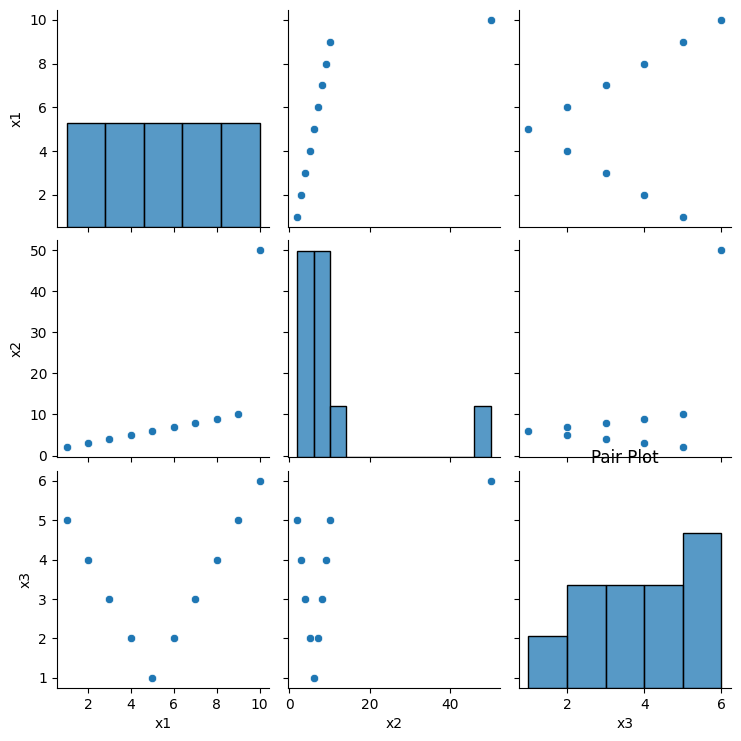

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example data
data = {
    'x1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'x2': [2, 3, 4, 5, 6, 7, 8, 9, 10, 50],
    'x3': [5, 4, 3, 2, 1, 2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)

# Create a pair plot
sns.pairplot(df)
plt.title("Pair Plot")
plt.show()

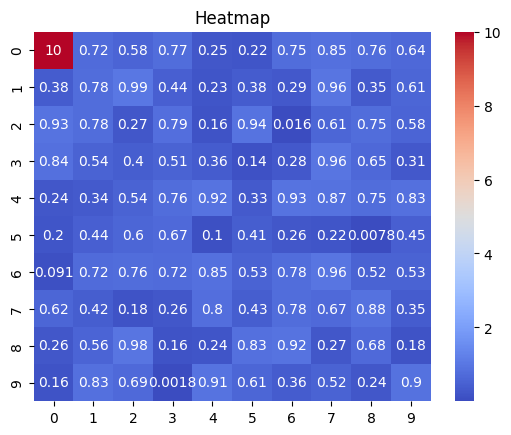

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = np.random.rand(10, 10)
data[0, 0] = 10  # Adding an outlier

# Create a heatmap
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title("Heatmap")
plt.show()

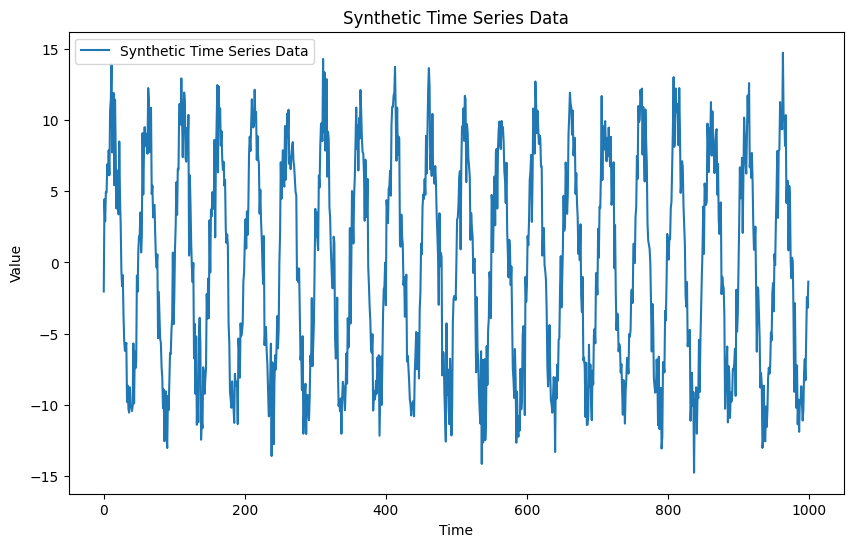

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for synthetic data generation
num_samples = 1000  # Total number of time steps
time_step = np.arange(num_samples)
period = 50  # Period of the sine wave
amplitude = 10  # Amplitude of the sine wave
noise_factor = 2  # Noise factor

# Generate a synthetic sine wave signal with noise
synthetic_data = amplitude * np.sin(2 * np.pi * time_step / period) + noise_factor * np.random.normal(size=num_samples)

# Create a pandas DataFrame
df = pd.DataFrame({'time': time_step, 'value': synthetic_data})

# Save the DataFrame to a CSV file
df.to_csv('your_time_series_data.csv', index=False)

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['value'], label='Synthetic Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Time Series Data')
plt.legend()
plt.show()

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('your_time_series_data.csv')

# Assuming the data has a single feature column 'value'
values = data['value'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# Prepare the data for time series forecasting
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 24  # Adjust based on your dataset
X, Y = create_dataset(scaled_values, time_step)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

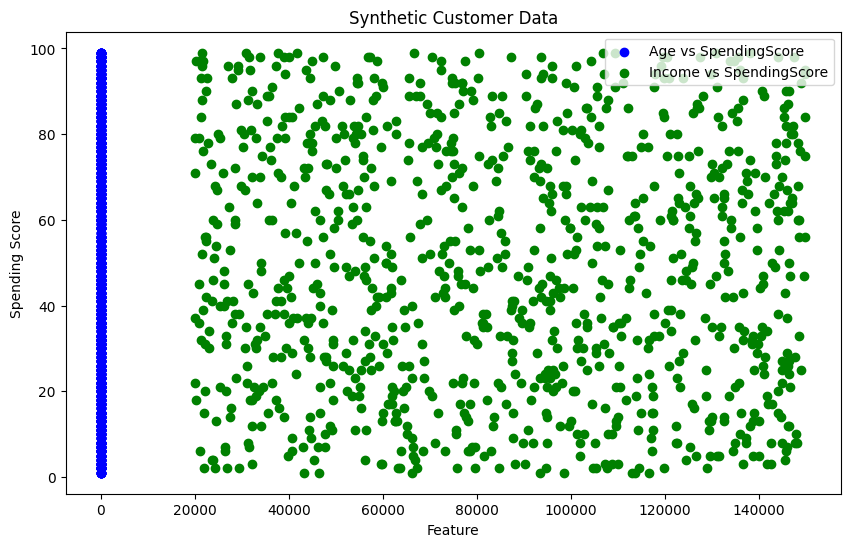

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Parameters for synthetic data generation
num_customers = 1000

# Generate synthetic data
np.random.seed(42)
ages = np.random.randint(18, 70, size=num_customers)
incomes = np.random.randint(20000, 150000, size=num_customers)
spending_scores = np.random.randint(1, 100, size=num_customers)

# Create a pandas DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Income': incomes,
    'SpendingScore': spending_scores
})

# Save the DataFrame to a CSV file
df.to_csv('customer_data.csv', index=False)

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['SpendingScore'], c='blue', label='Age vs SpendingScore')
plt.scatter(df['Income'], df['SpendingScore'], c='green', label='Income vs SpendingScore')
plt.xlabel('Feature')
plt.ylabel('Spending Score')
plt.title('Synthetic Customer Data')
plt.legend()
plt.show()

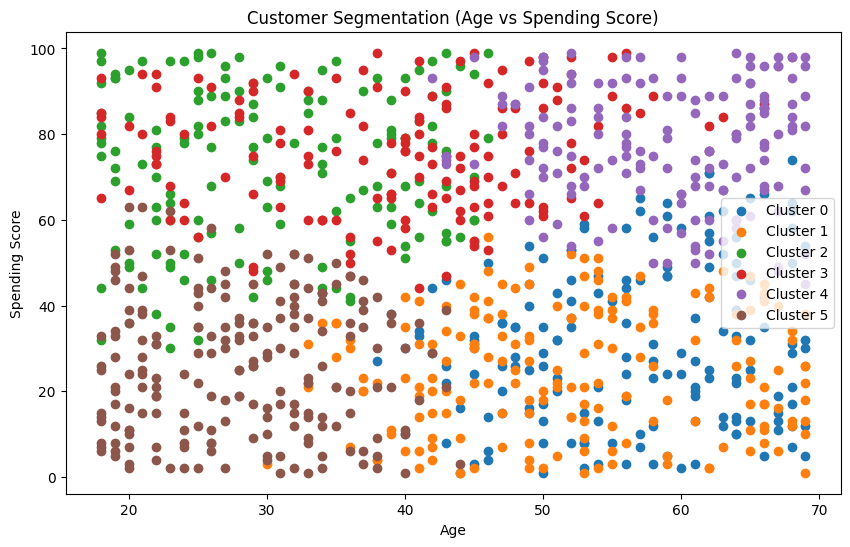

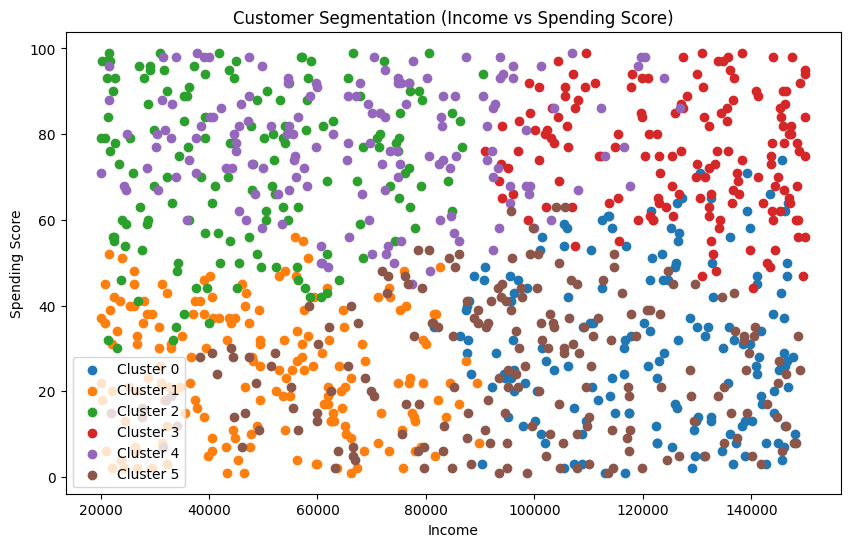

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the synthetic data
df = pd.read_csv('customer_data.csv')

# Select features for clustering
features = df[['Age', 'Income', 'SpendingScore']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

optimal_k = k_range[np.argmax(silhouette_scores)]

# Train the k-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

# Assign cluster labels to the original data
df['Cluster'] = kmeans.labels_

# Save the clustered data to a CSV file
df.to_csv('customer_segmented_data.csv', index=False)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['Age'], clustered_data['SpendingScore'], label=f'Cluster {cluster}')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation (Age vs Spending Score)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['Income'], clustered_data['SpendingScore'], label=f'Cluster {cluster}')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation (Income vs Spending Score)')
plt.legend()
plt.show()

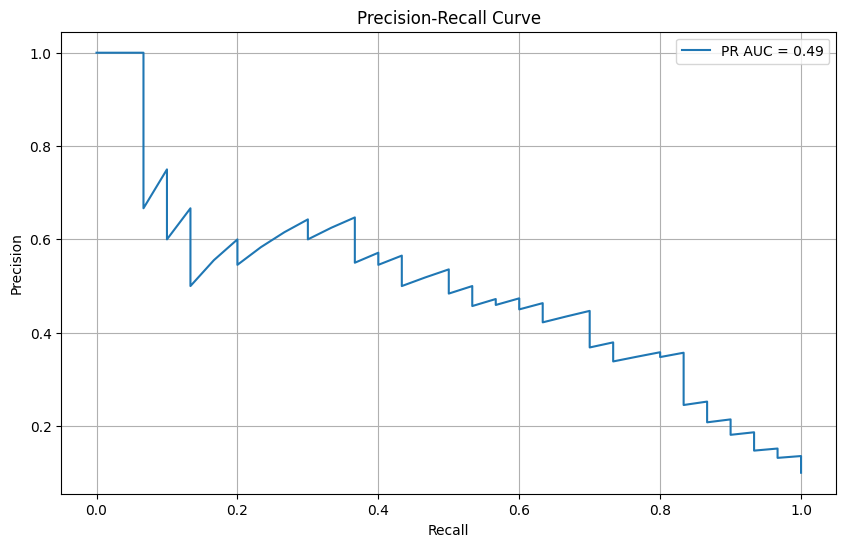

PR AUC: 0.49
Average Precision: 0.50


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# Step 1: Generate synthetic imbalanced data
X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    n_classes=2, 
    weights=[0.9, 0.1], 
    random_state=42
)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_scores = model.predict_proba(X_test)[:, 1]

# Step 4: Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Step 5: Calculate the PR AUC
pr_auc = auc(recall, precision)
average_precision = average_precision_score(y_test, y_scores)

# Step 6: Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Print PR AUC and Average Precision
print(f'PR AUC: {pr_auc:.2f}')
print(f'Average Precision: {average_precision:.2f}')

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Sample data: list of news articles
documents = [
    "The economy is improving and the stock market is up.",
    "New research in artificial intelligence is groundbreaking.",
    "The local sports team won their last game.",
    "Advancements in healthcare technology are remarkable.",
    "Political debates are heating up as elections approach.",
    "The economy is facing challenges with inflation.",
    "Breakthroughs in quantum computing are happening.",
    "The sports season is in full swing with exciting matches."
]

# Preprocess the text data
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(documents)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anhtrang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


InvalidParameterError: The 'stop_words' parameter of CountVectorizer must be a str among {'english'}, an instance of 'list' or None. Got {'in', 'while', 'hers', 'mustn', 'through', 'to', 've', 'was', 'wasn', 'whom', "shan't", 'once', 'did', 'and', 'their', 'aren', "couldn't", 'of', 'them', 'themselves', 'yourselves', 'where', 'all', 'ain', 'has', 'why', 'against', 't', 'both', 'can', "you're", 'herself', 'i', 'before', 'mightn', 'than', 'by', 'but', "mustn't", 'didn', 'some', 'how', 'not', 'have', 'is', 'or', 'because', 'here', 'such', 'its', 'our', "she's", 'they', 'no', 'needn', 'hadn', 'below', 'over', 'after', 'between', 'shouldn', 'she', 'for', "wouldn't", 'theirs', 'until', 'o', 'ourselves', 'itself', 'me', 'll', 'his', 'will', 'what', 'above', 'who', 'down', 'ma', 'same', 'myself', 'this', 'only', 'at', 'haven', 'into', "didn't", 'just', 'her', 'other', 'do', 'each', 'were', 'y', 'more', 'again', 'he', 'a', 'those', 'we', 'that', 'on', 'these', 'nor', "mightn't", 'does', 'yours', "wasn't", 'too', "hasn't", 'doesn', 'your', 'further', 'doing', 'so', 'don', 'any', 'the', 'd', 'during', 'most', 'from', "isn't", 'shan', 'couldn', 'won', 'which', 'very', "haven't", 'are', 'weren', 'be', "aren't", "won't", "that'll", 'as', 'am', 's', 'with', 'now', "shouldn't", "you'll", 'yourself', 'there', "should've", 're', "you've", 'should', 'm', 'hasn', 'up', 'under', 'when', 'my', "it's", 'been', 'out', 'about', 'own', 'had', 'an', "doesn't", 'ours', 'isn', "needn't", "hadn't", "you'd", 'himself', 'having', 'him', 'you', 'off', "don't", 'then', "weren't", 'few', 'being', 'wouldn', 'it', 'if'} instead.

In [10]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate synthetic data for heart rate (in BPM)
heart_rate_truth = np.random.normal(loc=70, scale=5, size=n_samples)
heart_rate_lie = np.random.normal(loc=80, scale=7, size=n_samples)

# Generate synthetic data for skin conductivity (GSR, in microsiemens)
gsr_truth = np.random.normal(loc=5, scale=1, size=n_samples)
gsr_lie = np.random.normal(loc=8, scale=2, size=n_samples)

# Generate synthetic data for respiration rate (in breaths per minute)
respiration_rate_truth = np.random.normal(loc=16, scale=2, size=n_samples)
respiration_rate_lie = np.random.normal(loc=20, scale=3, size=n_samples)

# Create labels (0 for truth, 1 for lie)
labels_truth = np.zeros(n_samples)
labels_lie = np.ones(n_samples)

# Combine the data
heart_rate = np.concatenate([heart_rate_truth, heart_rate_lie])
gsr = np.concatenate([gsr_truth, gsr_lie])
respiration_rate = np.concatenate([respiration_rate_truth, respiration_rate_lie])
labels = np.concatenate([labels_truth, labels_lie])

# Create a DataFrame
data = pd.DataFrame({
    'heart_rate': heart_rate,
    'gsr': gsr,
    'respiration_rate': respiration_rate,
    'label': labels
})

# Shuffle the DataFrame
data = data.sample(frac=1).reset_index(drop=True)

# Save the data to a CSV file
data.to_csv('synthetic_lie_detector_data.csv', index=False)

print("Synthetic data generated and saved to 'synthetic_lie_detector_data.csv'")

Synthetic data generated and saved to 'synthetic_lie_detector_data.csv'


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the data
# Assuming you have a CSV file with columns: 'heart_rate', 'gsr', 'respiration_rate', 'label'
data = pd.read_csv('synthetic_lie_detector_data.csv')

# Step 2: Data Preprocessing
# Handle missing values
data = data.dropna()

# Separate features and labels
X = data[['heart_rate', 'gsr', 'respiration_rate']]
y = data['label']  # 'label' should be binary: 0 for truth, 1 for lie

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Feature Extraction (already done in this case as we use raw features)

# Step 4: Model Selection and Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Cross-validation score
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f'Cross-validation Accuracy: {np.mean(cv_scores):.2f}')


# Load the synthetic data
data = pd.read_csv('synthetic_lie_detector_data.csv')

# Separate features and labels
X = data[['heart_rate', 'gsr', 'respiration_rate']]
y = data['label']


Accuracy: 0.95
Confusion Matrix:
[[195   8]
 [ 13 184]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       203
         1.0       0.96      0.93      0.95       197

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

Cross-validation Accuracy: 0.95


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000

# Features
heart_rate = np.random.normal(loc=70, scale=10, size=num_samples)
sweat_level = np.random.normal(loc=0.5, scale=0.2, size=num_samples)
eye_movement = np.random.normal(loc=0.1, scale=0.05, size=num_samples)
speech_pauses = np.random.normal(loc=2, scale=1, size=num_samples)

# Binary target variable (1: Liar, 0: Truth)
is_liar = np.random.binomial(1, 0.3, size=num_samples)  # Assuming 30% of samples are lies

# Create a DataFrame
data = pd.DataFrame({
    'heart_rate': heart_rate,
    'sweat_level': sweat_level,
    'eye_movement': eye_movement,
    'speech_pauses': speech_pauses,
    'is_liar': is_liar
})

# Split the data into training and testing sets
X = data.drop('is_liar', axis=1)
y = data['is_liar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[144   0]
 [ 56   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       144
           1       0.00      0.00      0.00        56

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.52      0.72      0.60       200



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
